# Cross-sectional analysis

- what was the situation in 2013 vs 2023? (air quality, fleet share, per country)

# Regression models

                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.022
Model:                                    OLS   Adj. R-squared:                 -0.087
Method:                         Least Squares   F-statistic:                    0.2018
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.664
Time:                                20:45:29   Log-Likelihood:                -71.341
No. Observations:                          11   AIC:                             146.7
Df Residuals:                               9   BIC:                             147.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

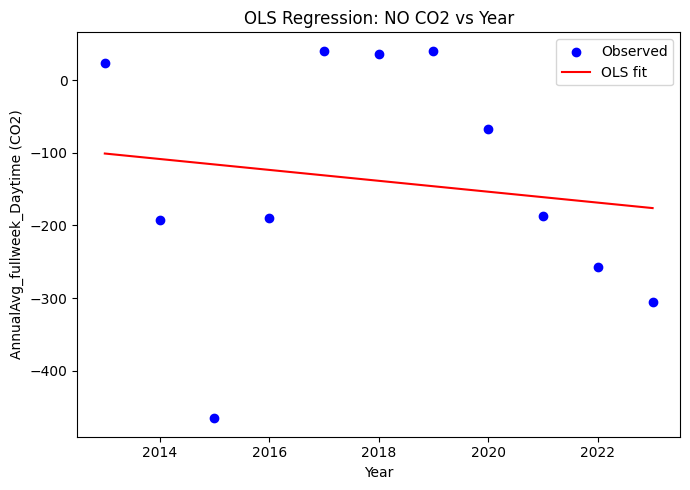

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

data_dir = "../data/processed"
output_dir = "../results"

# Load vehicle data
vehicle_data = pd.read_csv(os.path.join(data_dir, "combined_vehicle_data.csv"))

# Load AQ annual averages
aq = pd.read_csv(os.path.join(data_dir, "AQ_annual_averages.csv"))

# Merge vehicle data with AQ data
data = aq.merge(vehicle_data, on=['Country','Year'])

# Filter for Norway and CO2
country = "NO"
pollutant = "CO2"
df = data[(data["Country"] == country) & (data["Pollutant"] == pollutant)].copy()

# Pick the first available annual average column for CO2
annual_avg_cols = [col for col in df.columns if "AnnualAvg" in col]
if not annual_avg_cols:
    raise ValueError("No annual average columns found in data!")
target_col = annual_avg_cols[0]

# Prepare X (Year) and y (CO2 annual average)
df = df.sort_values("Year")
X = df["Year"].astype(float)
y = df[target_col].astype(float)

# Drop rows with missing values
mask = y.notnull() & X.notnull()
X = X[mask]
y = y[mask]

# Add constant for OLS intercept
X_ols = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_ols).fit()
print(model.summary())

# Plot
plt.figure(figsize=(7,5))
plt.scatter(X, y, label="Observed", color="blue")
plt.plot(X, model.predict(X_ols), color="red", label="OLS fit")
plt.xlabel("Year")
plt.ylabel(f"{target_col} (CO2)")
plt.title(f"OLS Regression: {country} CO2 vs Year")
plt.legend()
plt.tight_layout()
plt.show()


OLS summary for NO - CO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.045
Model:                                    OLS   Adj. R-squared:                 -0.061
Method:                         Least Squares   F-statistic:                    0.4219
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.532
Time:                                20:51:59   Log-Likelihood:                -71.211
No. Observations:                          11   AIC:                             146.4
Df Residuals:                               9   BIC:                             147.2
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

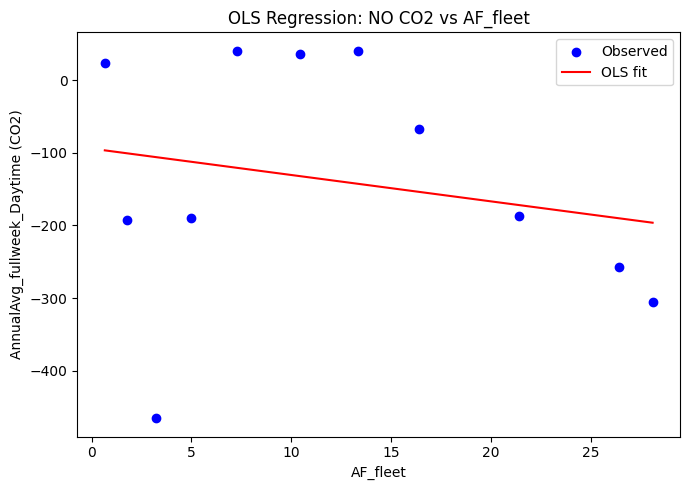


OLS summary for NO - NO:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.004
Model:                                    OLS   Adj. R-squared:                 -0.107
Method:                         Least Squares   F-statistic:                   0.03465
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.856
Time:                                20:52:01   Log-Likelihood:                -143.12
No. Observations:                          11   AIC:                             290.2
Df Residuals:                               9   BIC:                             291.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

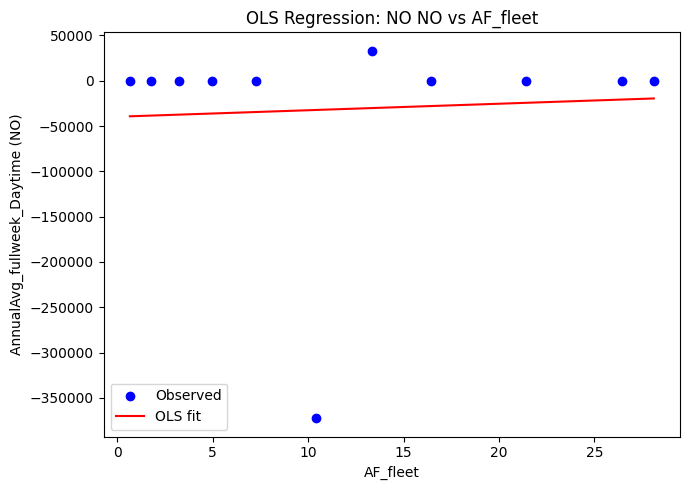


OLS summary for NO - NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.001
Model:                                    OLS   Adj. R-squared:                 -0.110
Method:                         Least Squares   F-statistic:                  0.004960
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.945
Time:                                20:52:01   Log-Likelihood:                -79.827
No. Observations:                          11   AIC:                             163.7
Df Residuals:                               9   BIC:                             164.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

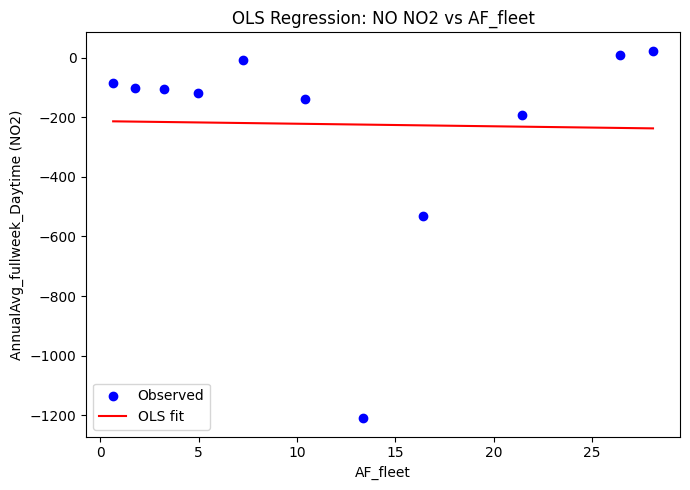


OLS summary for NO - NOX as NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.002
Model:                                    OLS   Adj. R-squared:                 -0.109
Method:                         Least Squares   F-statistic:                   0.01439
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.907
Time:                                20:52:02   Log-Likelihood:                -118.76
No. Observations:                          11   AIC:                             241.5
Df Residuals:                               9   BIC:                             242.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------

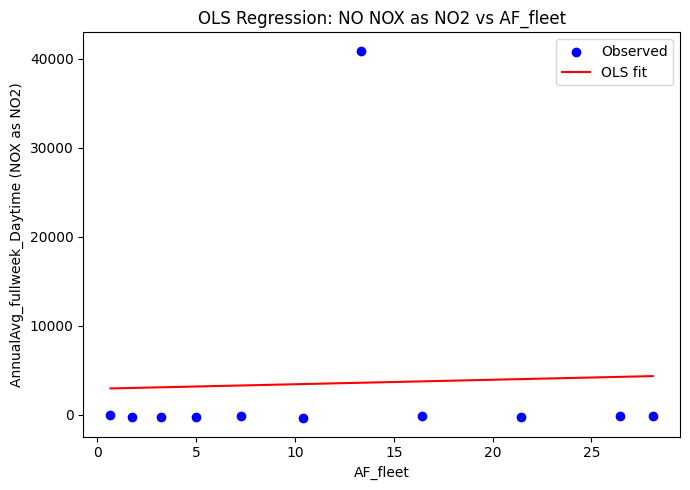


OLS summary for NO - PM10:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.024
Model:                                    OLS   Adj. R-squared:                 -0.085
Method:                         Least Squares   F-statistic:                    0.2203
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.650
Time:                                20:52:02   Log-Likelihood:                -79.320
No. Observations:                          11   AIC:                             162.6
Df Residuals:                               9   BIC:                             163.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

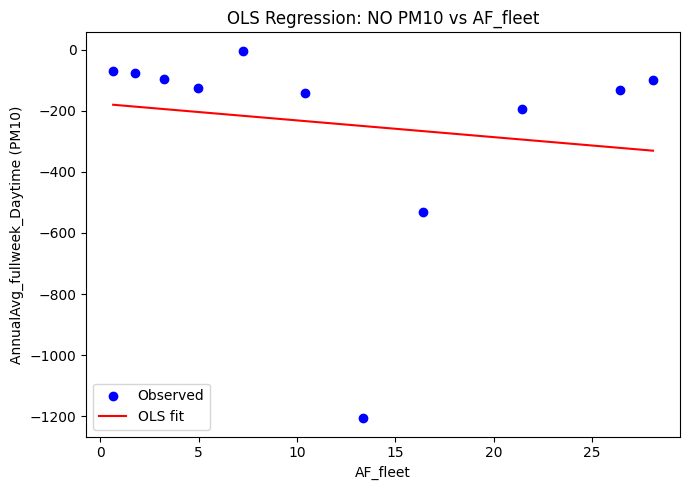


OLS summary for NO - PM2.5:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.045
Model:                                    OLS   Adj. R-squared:                 -0.061
Method:                         Least Squares   F-statistic:                    0.4226
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.532
Time:                                20:52:03   Log-Likelihood:                -79.475
No. Observations:                          11   AIC:                             162.9
Df Residuals:                               9   BIC:                             163.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

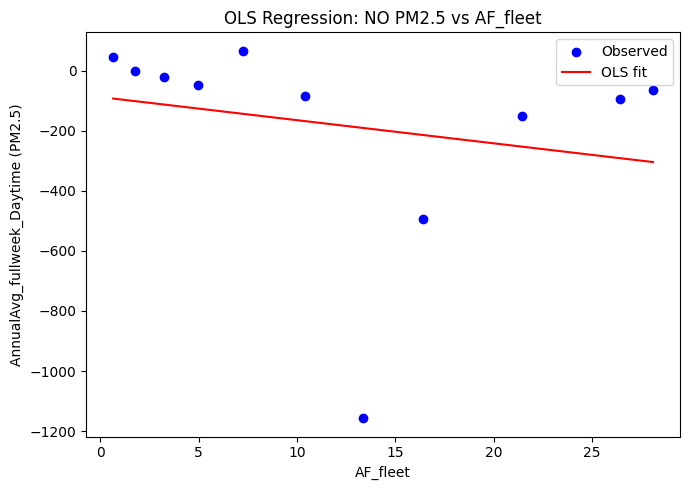

In [7]:
# OLS for all pollutants in Norway: AF_fleet as X, annual average as Y
import statsmodels.api as sm
import matplotlib.pyplot as plt

country = "NO"
pollutants = data[data["Country"] == country]["Pollutant"].unique()

for pollutant in pollutants:
    df = data[(data["Country"] == country) & (data["Pollutant"] == pollutant)].copy()
    annual_avg_cols = [col for col in df.columns if "AnnualAvg" in col]
    if not annual_avg_cols or "AF_fleet" not in df.columns:
        print(f"Skipping {pollutant}: missing columns.")
        continue
    target_col = annual_avg_cols[0]
    df = df.sort_values("AF_fleet")
    X = df["AF_fleet"].astype(float)
    y = df[target_col].astype(float)
    mask = y.notnull() & X.notnull()
    X = X[mask]
    y = y[mask]
    X_ols = sm.add_constant(X)
    model = sm.OLS(y, X_ols).fit()
    print(f"\nOLS summary for {country} - {pollutant}:")
    print(model.summary())
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, label="Observed", color="blue")
    plt.plot(X, model.predict(X_ols), color="red", label="OLS fit")
    plt.xlabel("AF_fleet")
    plt.ylabel(f"{target_col} ({pollutant})")
    plt.title(f"OLS Regression: {country} {pollutant} vs AF_fleet")
    plt.legend()
    plt.tight_layout()
    plt.show()


OLS summary for ALL COUNTRIES - CO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.292
Model:                                    OLS   Adj. R-squared:                  0.276
Method:                         Least Squares   F-statistic:                     18.58
Date:                        Fri, 16 May 2025   Prob (F-statistic):           8.76e-05
Time:                                20:53:17   Log-Likelihood:                -280.70
No. Observations:                          47   AIC:                             565.4
Df Residuals:                              45   BIC:                             569.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

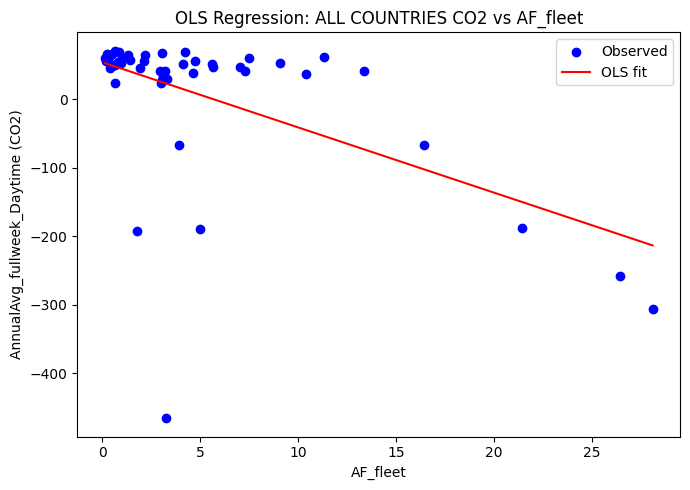


OLS summary for ALL COUNTRIES - NO:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.010
Model:                                    OLS   Adj. R-squared:                 -0.017
Method:                         Least Squares   F-statistic:                    0.3662
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.549
Time:                                20:53:17   Log-Likelihood:                -495.64
No. Observations:                          40   AIC:                             995.3
Df Residuals:                              38   BIC:                             998.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

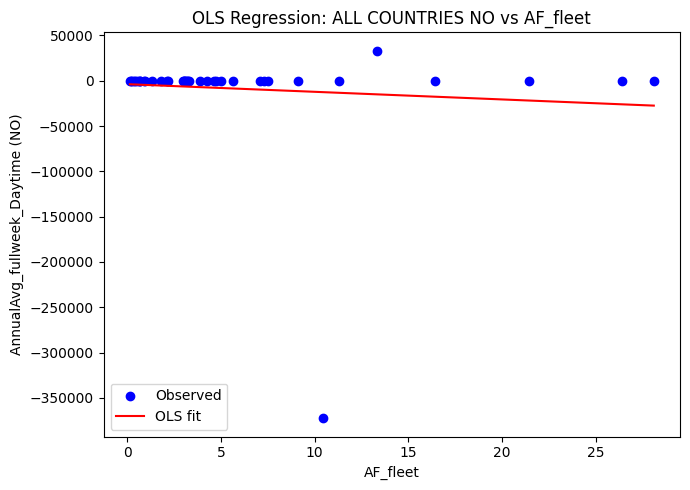


OLS summary for ALL COUNTRIES - NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.118
Model:                                    OLS   Adj. R-squared:                  0.098
Method:                         Least Squares   F-statistic:                     5.872
Date:                        Fri, 16 May 2025   Prob (F-statistic):             0.0196
Time:                                20:53:18   Log-Likelihood:                -305.54
No. Observations:                          46   AIC:                             615.1
Df Residuals:                              44   BIC:                             618.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

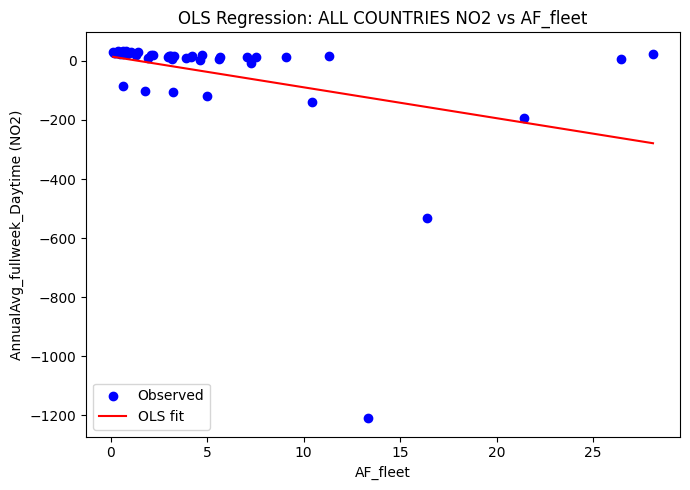


OLS summary for ALL COUNTRIES - NOX as NO2:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.030
Model:                                    OLS   Adj. R-squared:                  0.004
Method:                         Least Squares   F-statistic:                     1.154
Date:                        Fri, 16 May 2025   Prob (F-statistic):              0.290
Time:                                20:53:19   Log-Likelihood:                -397.02
No. Observations:                          39   AIC:                             798.0
Df Residuals:                              37   BIC:                             801.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

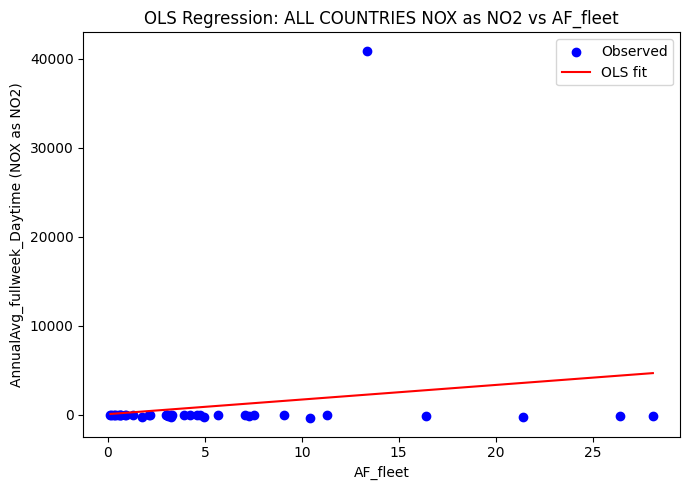


OLS summary for ALL COUNTRIES - PM10:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.189
Model:                                    OLS   Adj. R-squared:                  0.172
Method:                         Least Squares   F-statistic:                     10.74
Date:                        Fri, 16 May 2025   Prob (F-statistic):            0.00200
Time:                                20:53:19   Log-Likelihood:                -315.16
No. Observations:                          48   AIC:                             634.3
Df Residuals:                              46   BIC:                             638.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

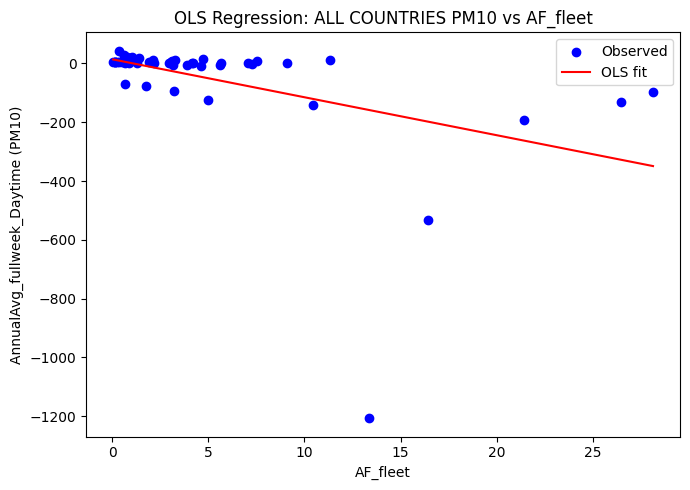


OLS summary for ALL COUNTRIES - PM2.5:
                                OLS Regression Results                                
Dep. Variable:     AnnualAvg_fullweek_Daytime   R-squared:                       0.189
Model:                                    OLS   Adj. R-squared:                  0.163
Method:                         Least Squares   F-statistic:                     7.215
Date:                        Fri, 16 May 2025   Prob (F-statistic):             0.0115
Time:                                20:53:19   Log-Likelihood:                -222.21
No. Observations:                          33   AIC:                             448.4
Df Residuals:                              31   BIC:                             451.4
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

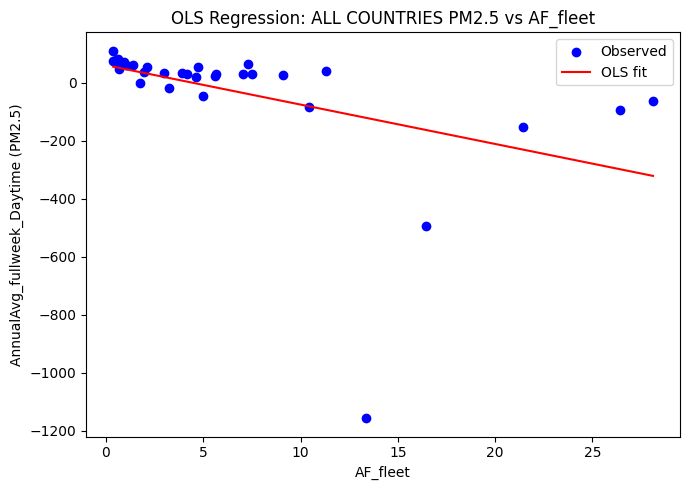

In [8]:
# OLS for all pollutants, all countries: AF_fleet as X, annual average as Y
import statsmodels.api as sm
import matplotlib.pyplot as plt

pollutants = data["Pollutant"].unique()

for pollutant in pollutants:
    df = data[data["Pollutant"] == pollutant].copy()
    annual_avg_cols = [col for col in df.columns if "AnnualAvg" in col]
    if not annual_avg_cols or "AF_fleet" not in df.columns:
        print(f"Skipping {pollutant}: missing columns.")
        continue
    target_col = annual_avg_cols[0]
    df = df.sort_values("AF_fleet")
    X = df["AF_fleet"].astype(float)
    y = df[target_col].astype(float)
    mask = y.notnull() & X.notnull()
    X = X[mask]
    y = y[mask]
    X_ols = sm.add_constant(X)
    model = sm.OLS(y, X_ols).fit()
    print(f"\nOLS summary for ALL COUNTRIES - {pollutant}:")
    print(model.summary())
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, label="Observed", color="blue")
    plt.plot(X, model.predict(X_ols), color="red", label="OLS fit")
    plt.xlabel("AF_fleet")
    plt.ylabel(f"{target_col} ({pollutant})")
    plt.title(f"OLS Regression: ALL COUNTRIES {pollutant} vs AF_fleet")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# ...existing code...

# Filter for one country and three pollutants
country = "NO"
pollutants = ["CO2", "NO2", "NO"]
data = data[(data["Country"] == country) & (data["Pollutant"].isin(pollutants))]

output_dir = "../results"
results_list = []
fig_dir = "../figures"
os.makedirs(fig_dir, exist_ok=True)

print("Filtered data shape:", data.shape)
print("Countries:", data['Country'].unique())
print("Pollutants:", data['Pollutant'].unique())
print("Feature columns:", feature_cols)
print("Target columns:", target_cols)

# 1) Aggregate across all years per pollutant
for pollutant in data['Pollutant'].unique():
    pollutant_data = data[data['Pollutant'] == pollutant]
    best_r2 = -np.inf
    best_model = None
    best_feature = None
    best_target = None
    best_X_test = None
    best_y_test = None
    best_y_pred = None
    for target in target_cols:
        for feature in feature_cols:
            X = pollutant_data[[feature]]
            y = pollutant_data[target]
            mask = y.notnull() & X[feature].notnull()
            print(f"Pollutant: {pollutant}, Target: {target}, Feature: {feature}, Valid rows: {mask.sum()}")
            if mask.sum() < 5:
                continue
            X_train, X_test, y_train, y_test = train_test_split(X[mask], y[mask], test_size=0.2, random_state=42)
            reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            models = models.reset_index().rename(columns={'index': 'Model'})
            models['Pollutant'] = pollutant
            models['Target'] = target
            models['Feature'] = feature
            results_list.append(models)
            # Find R2 column dynamically
            r2_col = None
            for col in models.columns:
                if 'r2' in col.lower():
                    r2_col = col
                    break
            if r2_col is not None and models.loc[0, r2_col] > best_r2:
                best_r2 = models.loc[0, r2_col]
                best_model_name = models.loc[0, 'Model']
                best_model = reg.models[best_model_name]
                best_feature = feature
                best_target = target
                best_X_test = X_test
                best_y_test = y_test
                best_y_pred = best_model.predict(X_test)
    # Plot only the very best model for this pollutant
    if best_model is not None:
        plt.figure(figsize=(7, 7))
        plt.scatter(best_y_test, best_y_pred, alpha=0.7)
        z = np.polyfit(best_y_test, best_y_pred, 1)
        p = np.poly1d(z)
        plt.plot(best_y_test, p(best_y_test), "b--", label="Regression line")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"Best: {best_model_name}\n{country} - {pollutant} - {best_target} vs {best_feature}\nR2={best_r2:.2f}")
        plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'r--', label="Ideal")
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, f"bestmodel_{country}_{pollutant}_aggregate.png"))
        plt.close()

# 2) Per year, aggregate for each pollutant
for pollutant in data['Pollutant'].unique():
    pollutant_data = data[data['Pollutant'] == pollutant]
    for year in pollutant_data['Year'].unique():
        year_data = pollutant_data[pollutant_data['Year'] == year]
        best_r2 = -np.inf
        best_model = None
        best_feature = None
        best_target = None
        best_X_test = None
        best_y_test = None
        best_y_pred = None
        for target in target_cols:
            for feature in feature_cols:
                X = year_data[[feature]]
                y = year_data[target]
                mask = y.notnull() & X[feature].notnull()
                print(f"Year: {year}, Pollutant: {pollutant}, Target: {target}, Feature: {feature}, Valid rows: {mask.sum()}")
                if mask.sum() < 5:
                    continue
                X_train, X_test, y_train, y_test = train_test_split(X[mask], y[mask], test_size=0.2, random_state=42)
                reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
                models, predictions = reg.fit(X_train, X_test, y_train, y_test)
                models = models.reset_index().rename(columns={'index': 'Model'})
                models['Pollutant'] = pollutant
                models['Target'] = target
                models['Feature'] = feature
                models['Year'] = year
                results_list.append(models)
                r2_col = None
                for col in models.columns:
                    if 'r2' in col.lower():
                        r2_col = col
                        break
                if r2_col is not None and models.loc[0, r2_col] > best_r2:
                    best_r2 = models.loc[0, r2_col]
                    best_model_name = models.loc[0, 'Model']
                    best_model = reg.models[best_model_name]
                    best_feature = feature
                    best_target = target
                    best_X_test = X_test
                    best_y_test = y_test
                    best_y_pred = best_model.predict(X_test)
        # Plot only the very best model for this pollutant/year
        if best_model is not None:
            plt.figure(figsize=(7, 7))
            plt.scatter(best_y_test, best_y_pred, alpha=0.7)
            z = np.polyfit(best_y_test, best_y_pred, 1)
            p = np.poly1d(z)
            plt.plot(best_y_test, p(best_y_test), "b--", label="Regression line")
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.title(f"Best: {best_model_name}\n{country} - {pollutant} ({year}) - {best_target} vs {best_feature}\nR2={best_r2:.2f}")
            plt.plot([best_y_test.min(), best_y_test.max()], [best_y_test.min(), best_y_test.max()], 'r--', label="Ideal")
            plt.tight_layout()
            plt.savefig(os.path.join(fig_dir, f"bestmodel_{country}_{pollutant}_{year}.png"))
            plt.show()
            plt.close()

# Save all model results
if results_list:
    all_results = pd.concat(results_list, ignore_index=True)
    all_results.to_csv(os.path.join(output_dir, "model_results_summary.csv"), index=False)
    print("Saved all model results to model_results_summary.csv")
else:
    print("No valid model runs: check your data and thresholds!")